Decision Trees are very powerful machine learning algorithms which can be used for regression or classification tasks.
They also form an integral part of Random Forests which are powerful ensemble machine learning algorithms.

# Training and Visualising a Decision Tree

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [35]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [36]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

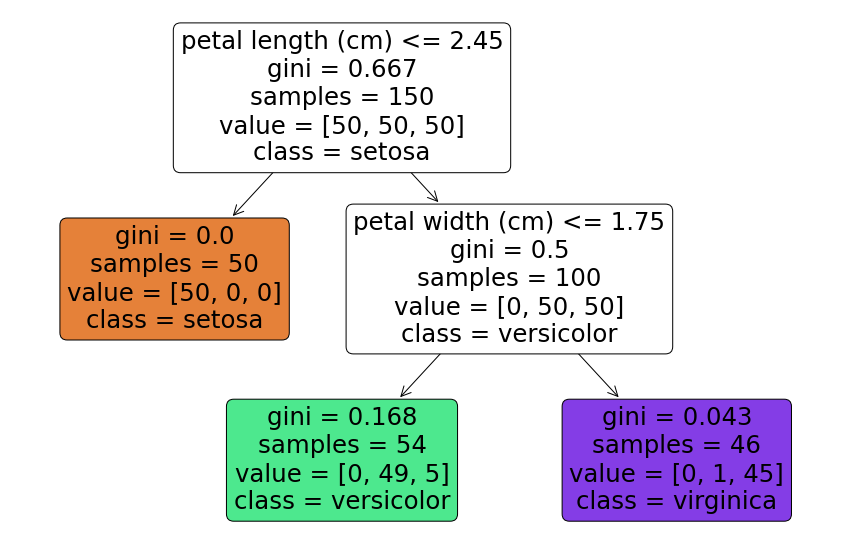

In [38]:
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:], class_names = iris.target_names, rounded=True)
plt.show()

# Predictions

If we have an unknown iris flower and we would like to classify it we can follow the decision tree. We start at the root node. This asks if our flower has petal length less than 2.45 cm, if it is we move to the root's left child node. Since this is a leaf node we can conclude that our flower is Iris-Setosa. If the petal length of the flower is greater than 2.45 cm we move to the node's right child node. Since this is not a leaf node it asks a further question. If the petal width of the flower is less than 1.75 cm then it's probably Iris-Versicolor if the petal width is greater than 1.75 cm then it's probably Iris-Virginica.

The value attribute is a count of the training instances of each class the node applies to. For example 50 Iris-Versicolor and Iris-Virginica have a petal length greater than 2.45 cm which are all the flowers of that class

## Gini impurity

$\Large G_i = 1 - \sum_{k=1}^{n}p_{i,k}^{2} $

The gini score for the depth 1 right node is $1 - (50/100)^2 - (50/100)^2 = 1 - 0.25 - 0.25 = 0.25$. 

# Estimating Class Probabilities

In [41]:
tree_clf.predict_proba([[4.5, 1.2]])

array([[0.        , 0.90740741, 0.09259259]])

This expected because the model starts at the root node then goes to the left child node since 4.5 cm > 2.45 cm and then it moves to the right child node at depth 2 since 1.2 cm < 1.75 cm. In this node the probability that the flower is versicolor is 
$ 0/54 = 0$ for Iris-Setosa, $49/54 = 0.90740741$ for Iris-Versicolor and $5/54 = 0.09259259$.

In [42]:
tree_clf.predict([[4.5, 1.2]]) # So it predicts the most probable class

array([1])

# The CART Training Algorithm

The algorithm used by sklearn to train decision trees is the Classification And Regression Tree (CART) algorithm. This algorithm begins by splitting the dataset into two subsets using a single feature and a threshold. It chooses the feature $k$ and the threshold $t_k$ by searching for the pair $(k, t_k)$ that produces the purest subsets. The cost function that the algorithm is trying to minimise is 

$\Large J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

Here $G_{left}$ is the gini impurity of the left subset and $G_{right}$ is the gini impurity of the right subset.

Once the data is split into two subsets the algorithm continues splitting the subsets using the same idea until it reaches the maximum depth or until the gini impurity cannot be reduced any further.

# Computational Complexity

Predictions involve traversing the tree downwards checking the value of one feature at each node and therefore the time complexity for making predictions is $\mathcal{O}(\log_2(m))$ which roughly the number of nodes we through as we traverse the tree. So making predictions is relatively quick even for large training sets.

However, during training the algorithm compares all the features on all samples at each node. This results in a time complexity for the training process of $\mathcal{O}(n \times \log_2(m)).$

# Entropy

Another type of impurity measure we can use is the entropy. In Scikit-Learn we can change which impurity measure by setting the criterion hyperparameter to "entropy" or "gini". Just like the gini score the entropy is zero when a node contains values of one class only. The entropy is defined as 

$\Large H_i = -\sum_{k = 1}^{n} p_{i, k}\log_{2}\left(p_{i,k}\right)$ where $p_{i, k} \neq 0$

The entropy for the right node at depth 2 is 

$\Large H = -\frac{1}{46}\log_2\left(\frac{1}{46}\right) - \frac{45}{46}\log_2\left(\frac{45}{46}\right) \approx 0.151. $

Overall there is not a big difference between the gini or entropy impurity measures, although the gini measure is faster to compute.

# Regularization Hyperparameters

With linear models an assumption prior to training is assuming the data is linear and so the degrees of freedom are restricted prior to training. However, if a decision tree is left unconstrained it can overfit the data and so it must be regularized during training. This can be done in Scikit-Learn by restricting the following hyperparameters

max_depth - This can be reduced to regularise the model and prevent overfitting. The default is None.

min_samples_split - The minimum number of samples a node must have before it can be split.

min_samples_leaf - The minimum number of samples a leaf node must have.

min_weight_fraction_leaf - This is the minimum fraction of the total sample weight a leaf node must have.

max_leaf_nodes - maximum number of leaf nodes.

max_features - maximum number of features that are considered before splitting each node.

# Regression

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [78]:
X = 6*np.random.rand(100, 1) - 3
y = 2*X**2 + X + 5 + np.random.randn(100, 1)

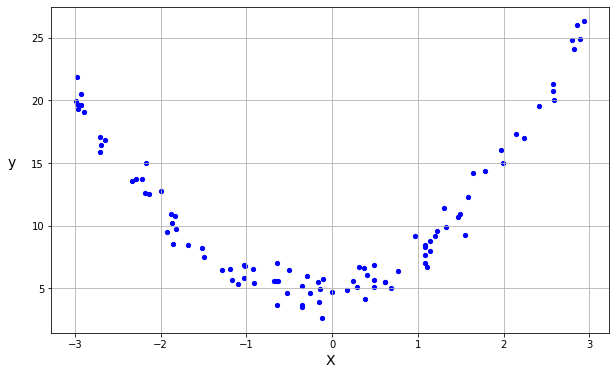

In [79]:
plt.figure(figsize=(10, 6))
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation = 360,  fontsize=14, labelpad = 20)
plt.grid()
plt.scatter(X, y, c = 'blue', s = 18)
plt.show()

In [80]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

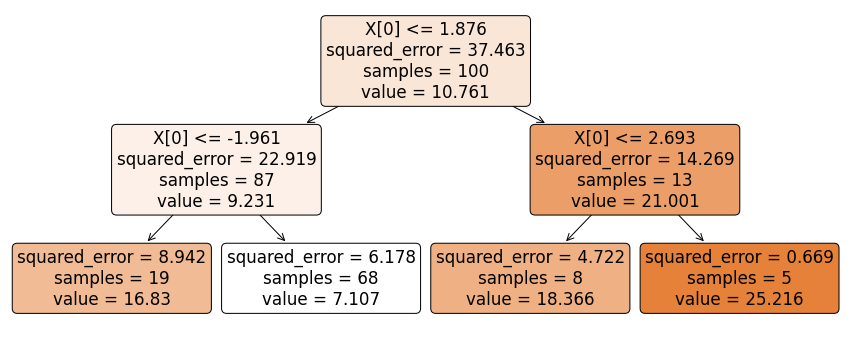

In [82]:
plt.figure(figsize=(15, 6))
plot_tree(tree_reg, filled=True, rounded=True)
plt.show()

Making predictions works in a similar way to the classification tree. If we have a new instance X = -1 then starting at the root node we go to the left child node and then to the right leaf node so we end up with a predicted y value of 7.107. This predicted value is the average of 68 training samples associated to this leaf node. This prediction results in a MSE of 6.178 over the 68 samples.

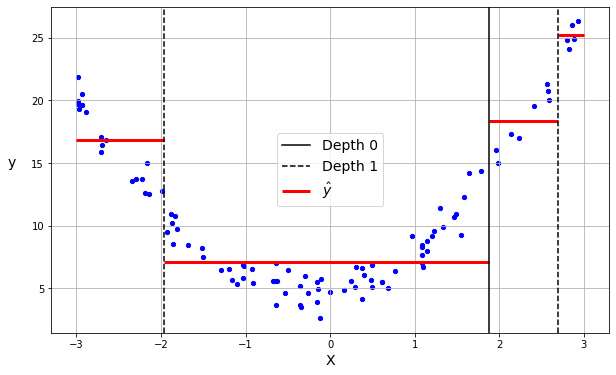

In [115]:
plt.figure(figsize=(10, 6))
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation = 360,  fontsize=14, labelpad = 20)
plt.grid()
plt.axvline(1.876, c='black', linestyle = '-', label = 'Depth 0')
plt.axvline(-1.961, c='black', linestyle='--', label = 'Depth 1')
plt.axvline(2.693, c='black', linestyle = '--')
plt.hlines(xmin = -3, xmax = -1.961, y = 16.83, color='red', linewidth=3, label='$\hat{y}$')
plt.hlines(xmin = -1.961, xmax = 1.876, y = 7.107, color='red', linewidth=3)
plt.hlines(xmin = 1.876, xmax = 2.693, y = 18.366, color='red', linewidth=3)
plt.hlines(xmin = 2.693, xmax = 3., y = 25.216, color='red', linewidth=3)
plt.scatter(X, y, c = 'blue', s = 18)
plt.legend(loc='center', fontsize=14)
plt.show()

With regression the CART algorithm splits the training data in a way that minimises the MSE rather than the impurity. The cost function the algorithm minimises is

$\Large J(k, t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$

$\Large MSE_{node} = \sum_{i \epsilon node}\left(\hat{y}_{node} - y^{(i)}\right)^2$

$\Large \hat{y}_{node} = \frac{1}{m_{node}}\sum_{i \epsilon node}y^{(i)}$

Decision trees are also prone to overfitting with regression tasks so they need to regularized by restricting the hyperparameters i.e. max_depth and min_samples_leaf.

Since decision tree create splits based on orthogonal decision boundaries they can end up overfitting if the dataset is rotated. A solution to this is to use PCA which selects the best orientation for the training dataset.
Decision trees are also sensitive to small variations in the training data and since Sci-kit Learn uses stochastic training algorithm that randomly selects the set of features to be evaluated at each node predictions can be different unless the random_state hyperparameter is set. One can use a random forest regressor which uses an average prediction over several decision tree regressors.